# Improved Accuracy Model

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Best Parameters found by GridSearchCV: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (MSE): 0.37663984391034677
R-squared (R²): 0.46829007171059034
Mean Absolute Error (MAE): 0.4691939404306762
Explained Variance Score (EVS): 0.4753533555624999


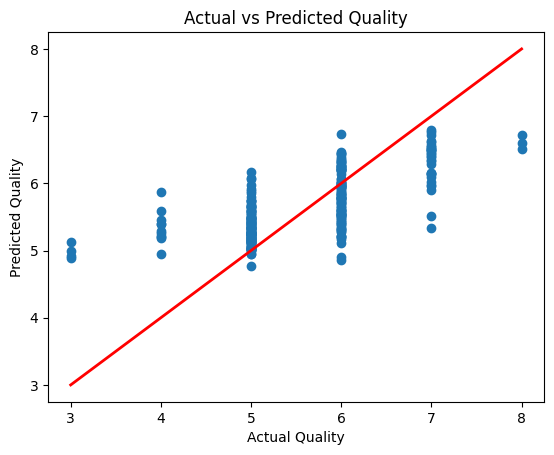

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data with the correct delimiter
df = pd.read_csv("winequality-red.csv", delimiter=';')
# Step 2: Exploratory Data Analysis (EDA)
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Drop missing values if any
df.drop_duplicates(inplace=True)  # Remove duplicates

# Step 3: Split the dataset into features and target variable
X = df.drop("quality", axis=1)  # Features
y = df["quality"]  # Target

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Create ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)

# Step 7: Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Reduced range
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)  # Reduced cv for faster tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
print("Best Parameters found by GridSearchCV:", grid_search.best_params_)

# Step 8: Train the model with the best hyperparameters
best_model.fit(X_train_scaled, y_train)

# Step 9: Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Explained Variance Score (EVS):", evs)

# Optional: Plot Actual vs Predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.show()

